# FordA Dataset exploration
This data was originally used in a competition in the 2008 IEEE World Congress on Computational Intelligence. The classification problem is to diagnose whether a certain symptom exists or not in an automotive subsystem. Each case consists of 500 measurements of engine noise.

In [4]:
from torch.utils.data import Dataset, DataLoader
import torch
import matplotlib.pyplot as plt
import numpy as np

In [5]:
root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"

In [6]:
train_data = np.loadtxt(root_url + "FordA_TRAIN.tsv", delimiter="\t")
test_data = np.loadtxt(root_url + "FordA_TEST.tsv", delimiter="\t")

In [7]:
print(train_data.shape)
print(test_data.shape)

(3601, 501)
(1320, 501)


In [8]:
# 3601 training examples of length 501
# 1320 testing examples of length 501

train_data[:15,:5]

array([[-1.        , -0.79717168, -0.66439208, -0.37301463,  0.04081512],
       [ 1.        ,  0.80485472,  0.63462859,  0.37347448,  0.03834345],
       [-1.        ,  0.7279851 ,  0.11128392, -0.49912439, -1.0686291 ],
       [-1.        , -0.23443909, -0.50215697, -0.73248781, -0.94612801],
       [-1.        , -0.17132785, -0.06228531,  0.235829  ,  0.71039591],
       [ 1.        , -0.54089708, -1.0140195 , -1.2982259 , -1.3208253 ],
       [ 1.        , -0.33405956, -1.0080137 , -1.5543535 , -1.922185  ],
       [ 1.        ,  1.0458903 ,  0.61119521,  0.15310839, -0.27967452],
       [ 1.        ,  0.825565  ,  0.38528249, -0.06241574, -0.48098205],
       [ 1.        , -0.28418135, -0.1926089 , -0.03229214,  0.17282345],
       [ 1.        ,  0.52956188,  0.69555632,  0.75455665,  0.68851735],
       [-1.        , -1.071044  , -1.1047491 , -1.0246995 , -0.8140425 ],
       [-1.        , -0.10944924, -0.22599804, -0.30023294, -0.33920626],
       [-1.        , -1.3485363 , -0.7

In [9]:
# the target label is the first element in each example
x_train, y_train = train_data[:, 1:], train_data[:, 0]

In [10]:
print(x_train.shape)
print(y_train.shape)

(3601, 500)
(3601,)


In [11]:
x_train[:2, :2]

array([[-0.79717168, -0.66439208],
       [ 0.80485472,  0.63462859]])

In [12]:
train_data[:2, 1:3]

array([[-0.79717168, -0.66439208],
       [ 0.80485472,  0.63462859]])

In [13]:
y_train[:2]

array([-1.,  1.])

In [14]:
train_data[:2, 0]

array([-1.,  1.])

In [15]:
# check if data seperation was correct
print("Input values correct: ", np.array_equal(x_train[:, :], train_data[:, 1:]))
print("Target values correct: ", np.array_equal(y_train[:], train_data[:, 0]))

Input values correct:  True
Target values correct:  True


In [16]:
# do the same for test data
x_test, y_test = test_data[:, 1:], test_data[:, 0]

In [17]:
print(x_test.shape)
print(y_test.shape)

(1320, 500)
(1320,)


In [18]:
x_train[2].std()

0.9989994975860028

In [19]:
x_train[0].mean()

-5.662000113204613e-10

In [20]:
x_test.std()

0.9989994994945227

In [21]:
x_test.mean()

-3.660013561718694e-11

In [22]:
# mean is ~0 and std is ~1, data is already processed

In [23]:
pos_cases = x_train[y_train == 1]
neg_cases = x_train[y_train == -1]

In [24]:
pos_cases.shape

(1755, 500)

In [25]:
neg_cases.shape

(1846, 500)

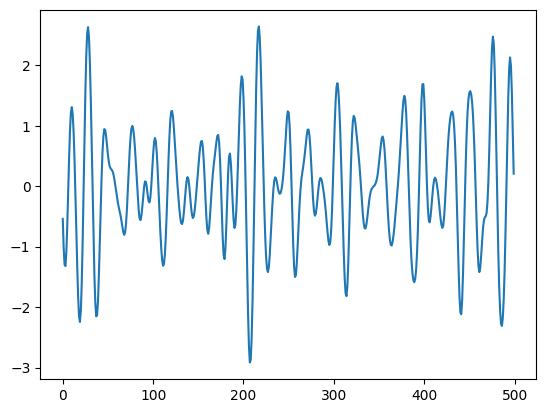

In [26]:
plt.figure()
plt.plot(pos_cases[1])
plt.show()
plt.close()

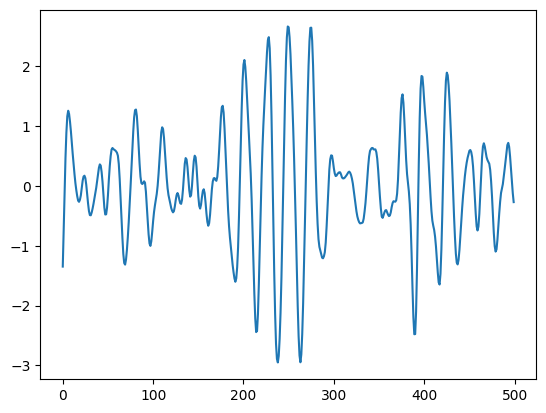

In [27]:
plt.figure()
plt.plot(neg_cases[6])
plt.show()
plt.close()

# Wrapping the data in a pytorch dataset and dataloader

In [28]:
class FordDataset(Dataset):
  def __init__(self, split="train"):
    self.root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"
    self.data = torch.tensor(np.loadtxt(root_url + "FordA_TRAIN.tsv", delimiter="\t"), dtype=torch.float32) if split=="train" else torch.tensor(np.loadtxt(root_url + "FordA_TEST.tsv", delimiter="\t"), dtype=torch.float32)
    self.labels = self.data[:, 0] # get first element from each example
    self.sequences = self.data[:, 1:] # get all elements after first element
    self.labels[self.labels == -1] = 0 # change all -1 labels to 0
    self.num_classes = len(torch.unique(self.labels)) # count the number of unique labels

  def __len__(self):
      return self.data.shape[0]

  def __getitem__(self, idx):
    sequence = torch.reshape(self.sequences[idx], (-1, 1)) # dim: seq_len x num_features
    label = torch.reshape(self.labels[idx], (-1, )) # dim: 1 x 1

    return sequence, label

In [29]:
train_dataset = FordDataset("train")
test_dataset = FordDataset("test")

In [30]:
train_dataset.num_classes

2

In [31]:
x, y = train_dataset[0]

In [32]:
x.shape

torch.Size([500, 1])

In [33]:
y.shape

torch.Size([1])

In [34]:
train_dataloader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)

In [35]:
train_features, train_labels = next(iter(train_dataloader))

In [36]:
train_features.shape

torch.Size([32, 500, 1])

In [37]:
train_labels.shape

torch.Size([32, 1])

In [38]:
train_features[:3, :5]

tensor([[[-1.0689],
         [-0.6332],
         [-0.1816],
         [ 0.1777],
         [ 0.3953]],

        [[ 0.4851],
         [ 0.0887],
         [-0.2552],
         [-0.5156],
         [-0.6874]],

        [[-0.1017],
         [-0.0643],
         [-0.0233],
         [ 0.0425],
         [ 0.1319]]])

In [39]:
train_labels[:3]

tensor([[1.],
        [0.],
        [0.]])

In [40]:
 # Remove singleton dimensions
plot_features = train_features.squeeze().numpy()
plot_labels = train_labels.squeeze().numpy()

In [41]:
plot_features.shape

(32, 500)

In [42]:
plot_labels.shape

(32,)

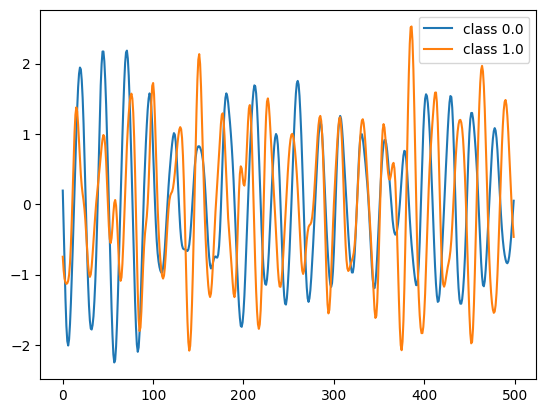

In [43]:
classes = np.unique(plot_labels)
plt.figure()
for c in classes:
  c_x_train = plot_features[plot_labels == c]
  plt.plot(c_x_train[3], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()

In [44]:
# test using simple models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Example setup
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=10000)
model.fit(X_train, Y_train)
print("Test accuracy:", model.score(X_test, Y_test))

Test accuracy: 0.5106382978723404


In [45]:
X_test.shape

(1081, 500)

In [46]:
Y_test.shape

(1081,)

In [47]:
x_train.shape

(3601, 500)

In [48]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

n_classes = len(np.unique(y_train))

# idx = np.random.permutation(len(x_train))
# x_train = x_train[idx]
# y_train = y_train[idx]

y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

In [49]:
x_train.shape

(3601, 500, 1)

In [50]:
y_train.shape

(3601,)

# Training a CNN on the data

In [56]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Conv1DModel(nn.Module):
    def __init__(self, input_channels, n_classes):
        super(Conv1DModel, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv1d(input_channels, 64, kernel_size=3, padding=1),
            nn.BatchNorm1d(64),
            nn.ReLU()
        )
        self.conv2 = nn.Sequential(
            nn.Conv1d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm1d(64),
            nn.ReLU()
        )
        self.conv3 = nn.Sequential(
            nn.Conv1d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm1d(64),
            nn.ReLU()
        )
        self.gap = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(64, n_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.gap(x)
        x = x.view(x.size(0), -1)  # Flatten the output for the fully connected layer
        x = self.fc(x)
        return x

In [57]:
import torch.optim as optim

input_channels = x_train.shape[1]
model = Conv1DModel(input_channels, n_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

In [58]:
# DataLoader setup
from torch.utils.data import TensorDataset, DataLoader
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [59]:
# Training process
def train_model(num_epochs):
    model.train()
    for epoch in range(num_epochs):
        for data, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

train_model(100)

Epoch 1/100, Loss: 0.5700520873069763
Epoch 2/100, Loss: 0.3095194697380066
Epoch 3/100, Loss: 0.5087183117866516
Epoch 4/100, Loss: 0.6360629796981812
Epoch 5/100, Loss: 0.32620638608932495
Epoch 6/100, Loss: 0.2294052541255951
Epoch 7/100, Loss: 0.3317354619503021
Epoch 8/100, Loss: 0.2277376353740692
Epoch 9/100, Loss: 0.5943566560745239
Epoch 10/100, Loss: 0.3594188690185547
Epoch 11/100, Loss: 0.08381176739931107
Epoch 12/100, Loss: 0.25927048921585083
Epoch 13/100, Loss: 0.40795400738716125
Epoch 14/100, Loss: 0.4827897250652313
Epoch 15/100, Loss: 0.20502695441246033
Epoch 16/100, Loss: 0.21236489713191986
Epoch 17/100, Loss: 0.28431472182273865
Epoch 18/100, Loss: 0.13653166592121124
Epoch 19/100, Loss: 0.12990911304950714
Epoch 20/100, Loss: 0.13002519309520721
Epoch 21/100, Loss: 0.22810503840446472
Epoch 22/100, Loss: 0.3994094729423523
Epoch 23/100, Loss: 0.2677249610424042
Epoch 24/100, Loss: 0.2878909409046173
Epoch 25/100, Loss: 0.3261716067790985
Epoch 26/100, Loss: 0.0

In [60]:
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

test_dataset = TensorDataset(x_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [61]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

def evaluate_model(model, data_loader):
    model.eval()
    true_labels = []
    predictions = []

    with torch.no_grad():
        for data, labels in data_loader:
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            predictions.extend(predicted.numpy())
            true_labels.extend(labels.numpy())

    accuracy = accuracy_score(true_labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predictions, average='weighted')
    conf_matrix = confusion_matrix(true_labels, predictions)

    return accuracy, precision, recall, f1, conf_matrix


In [62]:
accuracy, precision, recall, f1, conf_matrix = evaluate_model(model, test_loader)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 0.7780
Precision: 0.7782
Recall: 0.7780
F1 Score: 0.7778
Confusion Matrix:
 [[547 134]
 [159 480]]


# Training an encoder transformer

In [63]:
import torch
import torch.nn as nn

class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_heads, num_encoder_layers, dim_feedforward, n_classes, dropout=0.1):
        super(TransformerModel, self).__init__()

        # Embedding for positional encodings
        self.embedding = nn.Linear(input_dim, dim_feedforward)

        # Transformer Encoder
        encoder_layer = nn.TransformerEncoderLayer(d_model=dim_feedforward,
                                                   nhead=num_heads,
                                                   dim_feedforward=dim_feedforward,
                                                   dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_encoder_layers)

        # Global average pooling
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)

        # Output layer
        self.output = nn.Linear(dim_feedforward, n_classes)

    def forward(self, src):
        # src shape: [batch_size, seq_length, input_dim]
        src = src.permute(1, 0, 2)  # Change src to shape [seq_length, batch_size, input_dim]
        src = self.embedding(src)  # Change src to shape [seq_length, batch_size, dim_feedforward]
        src = self.transformer_encoder(src)  # Transformer output shape [seq_length, batch_size, dim_feedforward]
        src = src.permute(1, 2, 0)  # Change back to [batch_size, dim_feedforward, seq_length] for pooling
        src = self.global_avg_pool(src).squeeze(2)  # Global average pooling and remove last dimension
        output = self.output(src)  # Final output layer
        return output

In [64]:
input_dim = 1  # Number of features per timestep in the input
num_heads = 2
num_encoder_layers = 1
dim_feedforward = 128
n_classes = 2  # Number of output classes
dropout = 0.1

model = TransformerModel(input_dim, num_heads, num_encoder_layers, dim_feedforward, n_classes, dropout)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [65]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

def train_model(model, train_loader, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        for data, labels in train_loader:
            # data = data.permute(0, 2, 1)  # Adjust data dimensions to [batch_size, input_dim, seq_length]
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

train_model(model, train_loader, 10)

Epoch 1/10, Loss: 0.6900278329849243
Epoch 2/10, Loss: 0.7805297374725342
Epoch 3/10, Loss: 0.6842940449714661
Epoch 4/10, Loss: 0.6905501484870911


KeyboardInterrupt: 

In [74]:
accuracy, precision, recall, f1, conf_matrix = evaluate_model(model, test_loader)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 0.5159
Precision: 0.2662
Recall: 0.5159
F1 Score: 0.3512
Confusion Matrix:
 [[681   0]
 [639   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AttributeError: 'list' object has no attribute 'permute'

In [68]:
a,b = next(iter(test_loader))

In [70]:
out = model(a)

In [73]:
out[0]

tensor([0.4796, 0.2821], grad_fn=<SelectBackward0>)